# Data visualization

Today we are going to visualize our research results.

It's always better if we show our data on a colorful graph to catch readers eye.

## Introduction

How to make pretty plot:
    
* **DO NOT** use Word or Excel - they are not intended to make plots
* keep reasonably high resolution (usually 300 dpi is OK)
* do not left to much blank space
* keep your axes labeled
* use font size suitable to figure size
* use one or two font sizes - many different sizes are not looking good
* use distinguishable colours
* use color blind friendly palettes
* if appropriate, put explenatory schemes on plot
* automatize producing similar plots, keep convention and figure properties the same

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

## Significant figures

Significant figures (also known as the significant digits or precision) of a number in positional notation are digits in the number that are reliable and necessary to indicate the quantity of something. It is very important to put on figures values with reasonable number of significant digits. E.g.:

In [ ]:
d = 2  # cm

print(f"Diameter of circle: {d} cm")
print(f"Diameter of circle: {d:.2f} cm")


print(f"Area of circle: {np.pi*d**2} cm^2")
print(f"Area of circle: {np.pi*d**2:.0f} cm^2")
print(f"Area of circle: {np.pi*d**2:.2f} cm^2")
print(f"Area of circle: {np.pi*d**2:10.2f} cm^2")

Diameter of circle: 2 cm
Diameter of circle: 2.00 cm
Area of circle: 12.566370614359172 cm^2
Area of circle: 13 cm^2
Area of circle: 12.57 cm^2
Area of circle:      12.57 cm^2


## Scatter plot

Scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data

Firstly, let's generate some random data:

In [ ]:
size = 100
x1 = np.random.uniform(size=size)
y1 = x1 + 0.1 * np.random.normal(size=size)
x2 = 10 * np.random.uniform(size=size)
y2 = x2 + 1 * np.random.normal(size=size)
x3 = np.random.uniform(size=size)
y3 = x3 + 0.1 * np.random.normal(size=size) + 5

The easiest way to plot this data is the following one-liner:

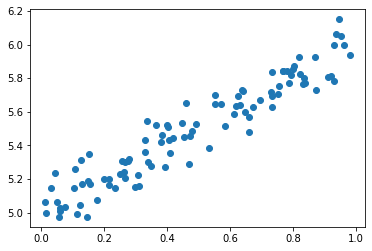

In [ ]:
plt.scatter(x3, y3)

This is useful for preliminary data inspection, however the features and overall quality of figure are poor. We can always investigate available options using `help` function.

In [ ]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

Option `s=` allows to adjust size of point. In this example the size of point is inverse proportional to distant to point (0.2, 0.3):

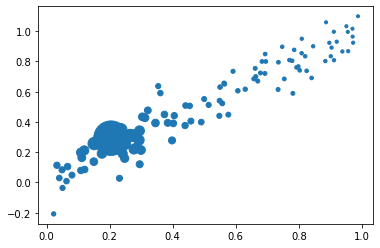

In [ ]:
point_size = 1/np.sqrt((x1-0.2)**2 + (y1-0.3)**2)

plt.scatter(x1, y1, s=10*point_size)

To increate readability, the edge line can be added:

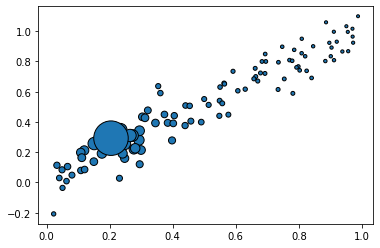

In [ ]:
point_size = 1/np.sqrt((x1-0.2)**2 + (y1-0.3)**2)

plt.scatter(x1, y1, s=10*point_size, linewidths=1, edgecolors='black')

Instead of point size, we can introduce color scale. In this example colour indicates distance to point (0.8, 0.4):

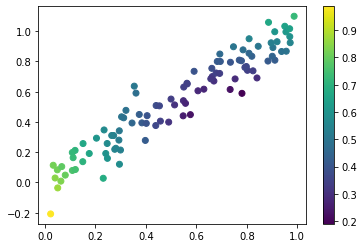

In [ ]:
point_color = np.sqrt((x1-0.8)**2 + (y1-0.4)**2)

plt.scatter(x1, y1, c=point_color)
plt.colorbar()

There exist a huge variety of predefined colour maps, you can also create your own one.

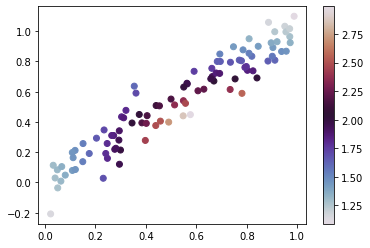

In [ ]:
cmap = plt.get_cmap("twilight")
plt.scatter(x1, y1, c=point_color, cmap=cmap)
plt.colorbar()

In this example we used discrete numbers to tag our data set and present categories in different colours:

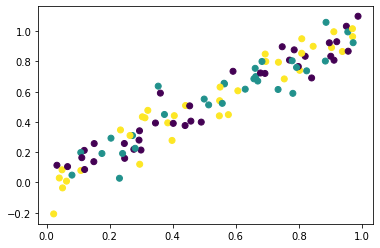

In [465]:
point_tag = np.random.randint(3, size=size)

plt.scatter(x1, y1, c=point_tag)

You can also change type of marker:

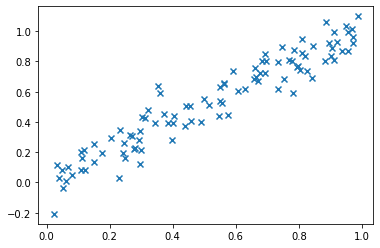

In [ ]:
plt.scatter(x1, y1, marker='x')

## Multiple plots and "decorations"

Usually we want to present multiple data series on one plot or even multiple subplots on one figure. For this purpose we introduce objects: figure and axis (subplot).

To create one subplot and add three data series we can use the following code:

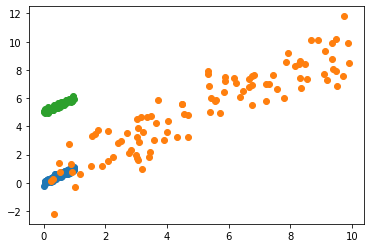

In [ ]:
figure = plt.figure()

ax = figure.add_subplot()

ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3)

We can also combine different types of charts on one subplot. In the following example we will represent graphically linear regression. 

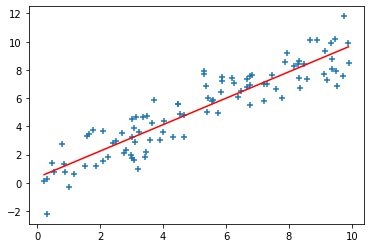

In [ ]:
# some magic to find parameters of line
M = np.vstack([x2, np.ones(len(x2))]).T
a, b = np.linalg.lstsq(M, y2, rcond=None)[0]
x = np.linspace(np.min(x2), np.max(x2), 2)
y = a * x + b

# actual plot
figure = plt.figure()

ax = figure.add_subplot()
ax.scatter(x2, y2, marker="+")  # single points
ax.plot(x, y, color="red") # line

Let's improve resolution and readalibity of figure, by increasing size.

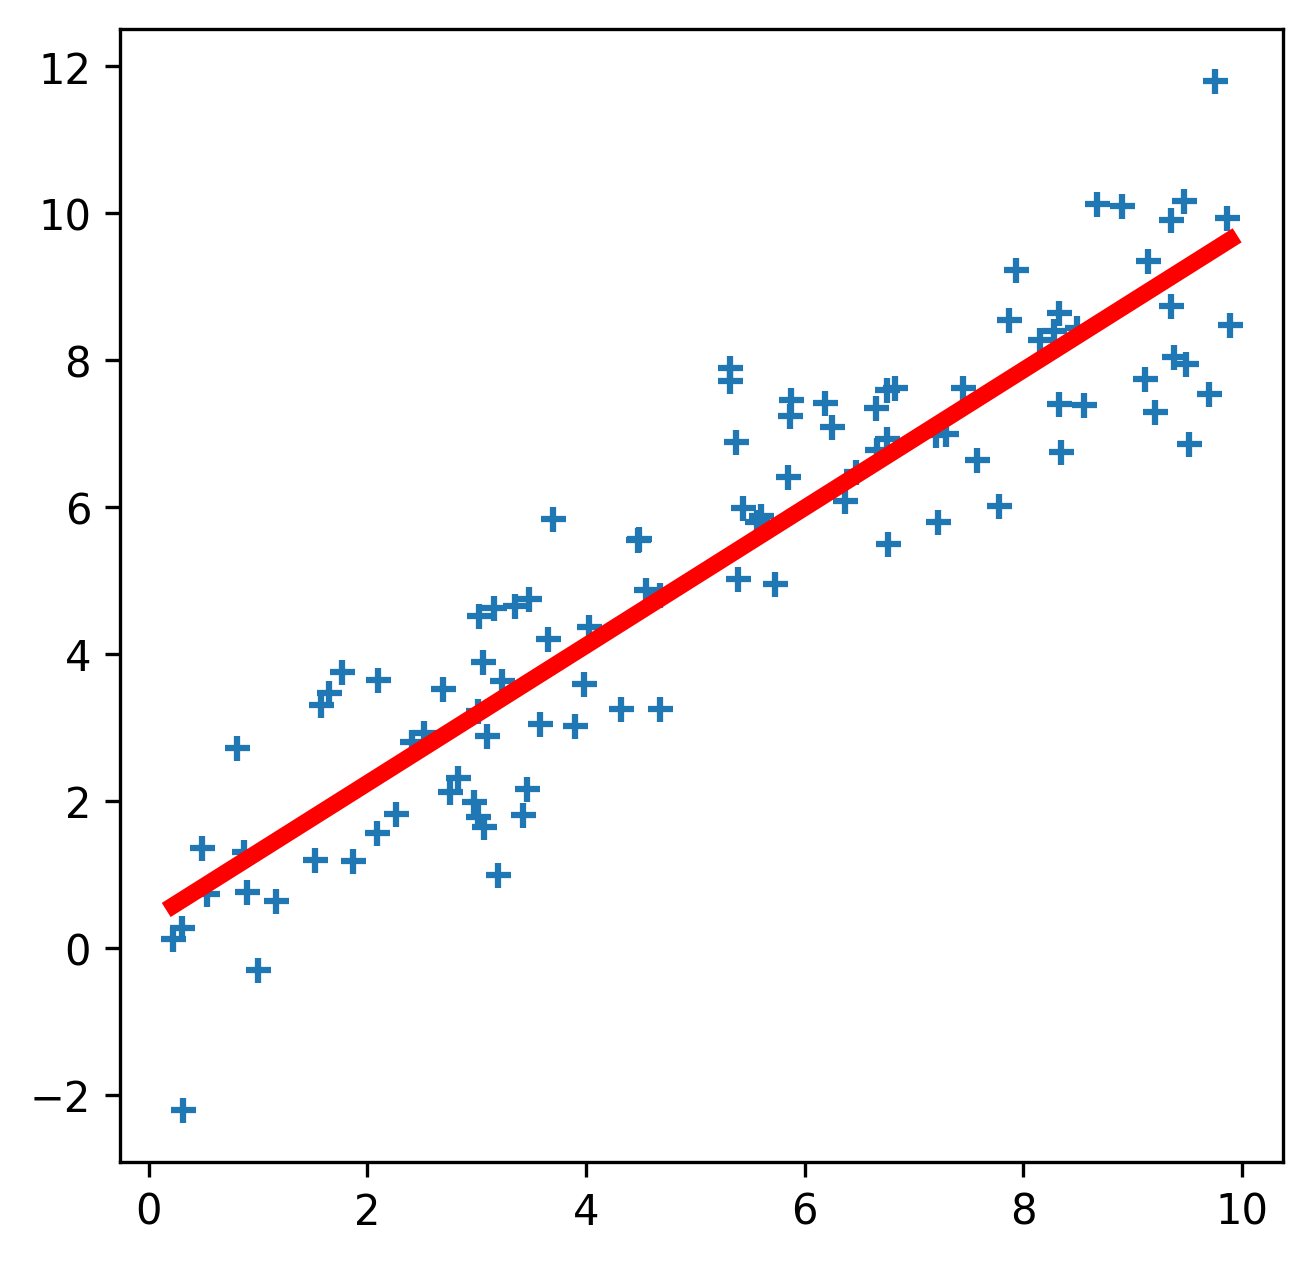

In [509]:
M = np.vstack([x2, np.ones(len(x2))]).T
a, b = np.linalg.lstsq(M, y2, rcond=None)[0]
x = np.linspace(np.min(x2), np.max(x2), 2)
y = a * x + b

figure = plt.figure()
figure.set_dpi(300)
figure.set_size_inches([5, 5])
figure.set_facecolor("white")

ax = figure.add_subplot()
ax.scatter(x2, y2, marker="+")
ax.plot(x, y, color="red", linewidth=4)

We can easily insert equations and text:

Text(0, 0.5, 'y values')

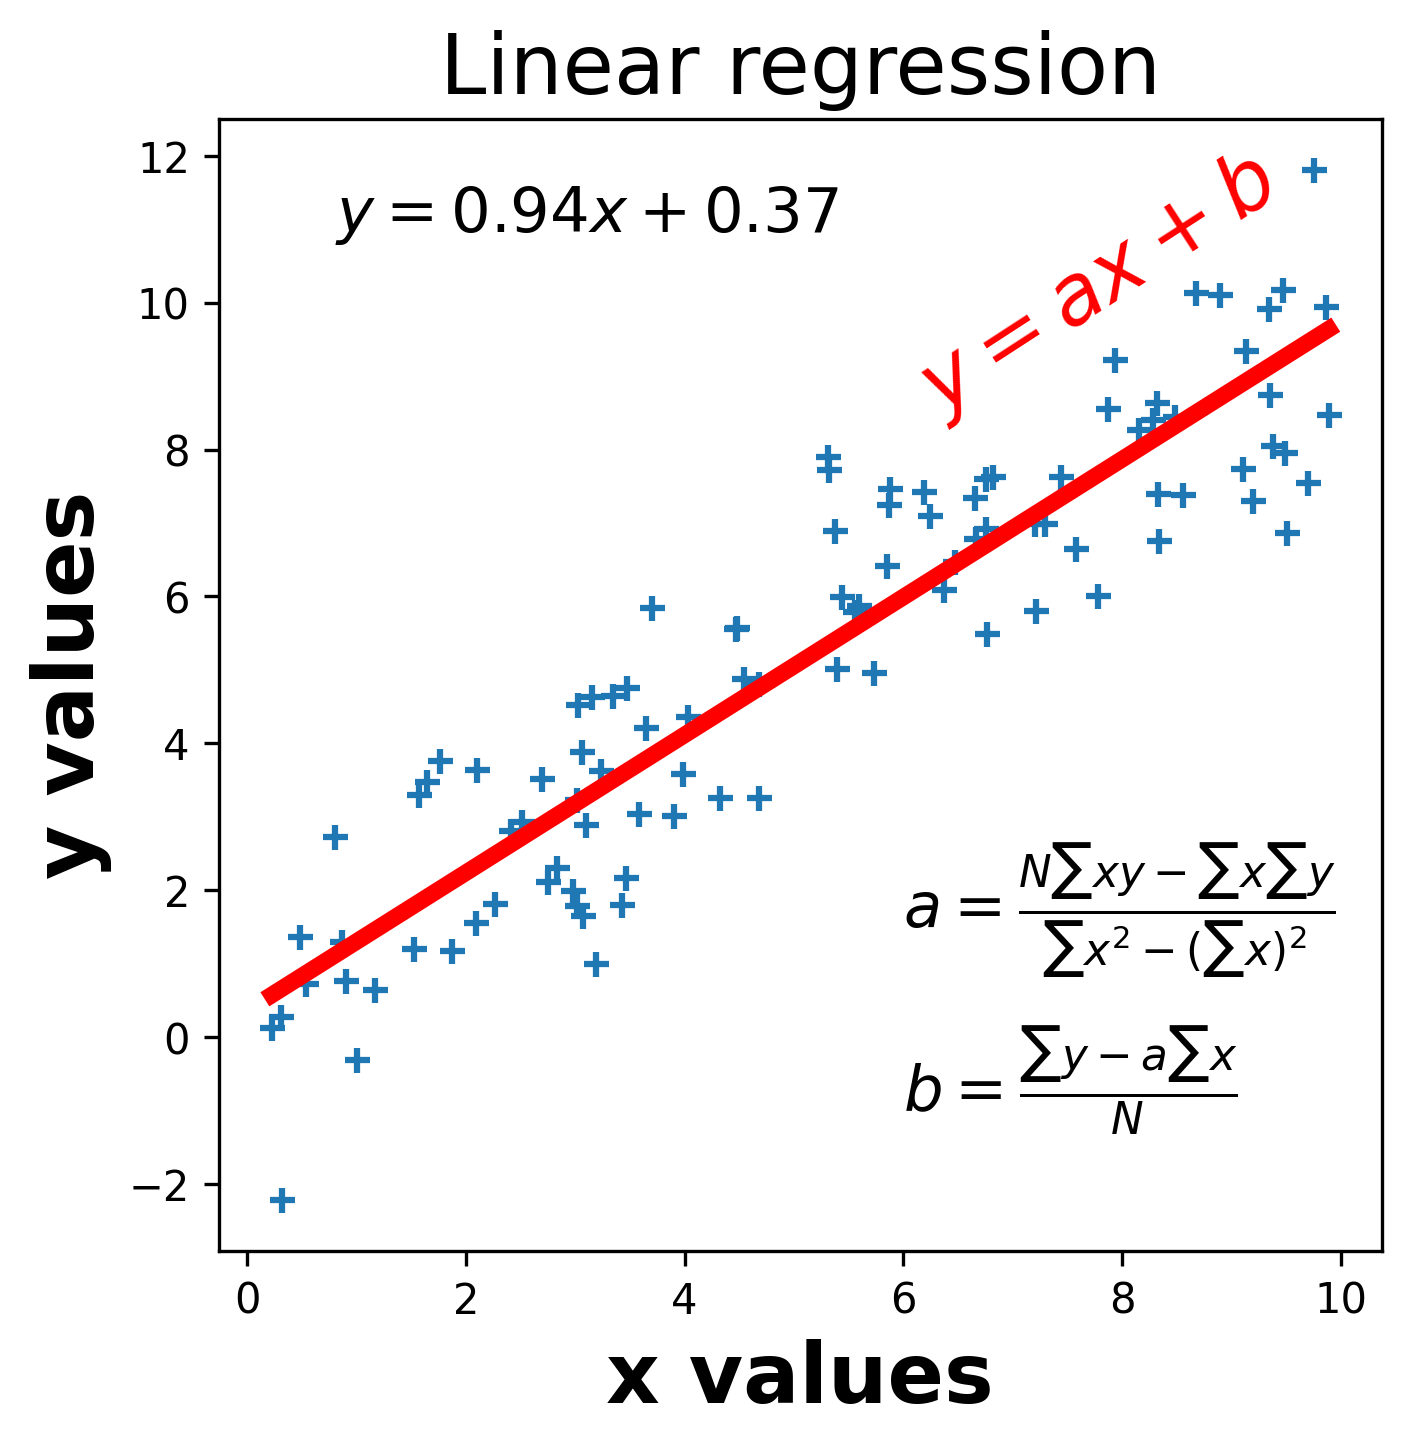

In [528]:
M = np.vstack([x2, np.ones(len(x2))]).T
a, b = np.linalg.lstsq(M, y2, rcond=None)[0]
x = np.linspace(np.min(x2), np.max(x2), 2)
y = a * x + b

figure = plt.figure()
figure.set_dpi(300)
figure.set_size_inches([5, 5])
figure.set_facecolor("white")

ax = figure.add_subplot()
ax.scatter(x2, y2, marker="+")
ax.plot(x, y, color="red", linewidth=4)

ax.set_title("Linear regression", fontsize=20)
ax.text(x=0.1, y=0.9, s=f"$y={a:.2f}x+{b:.2f}$", transform=ax.transAxes, fontsize=15)
# ax.text(x=0.1, y=0.8, s=f"y={a:.2f}x+{b:.2f}", transform=ax.transAxes, fontsize=15)

ax.text(x=6, y=8.5, s="$y=ax+b$", color="red", fontsize=20, rotation=33)
ax.text(x=6, y=1.5, s=r"$a = \frac{N \sum xy - \sum x \sum y}{\sum x^2 - (\sum x)^2}$", fontsize=15)
ax.text(x=6, y=-1, s=r"$b = \frac{\sum y - a \sum x }{N}$", fontsize=15)

ax.set_xlabel("x values", fontsize=20, weight=1000)
ax.set_ylabel("y values", fontsize=20, weight=1000)

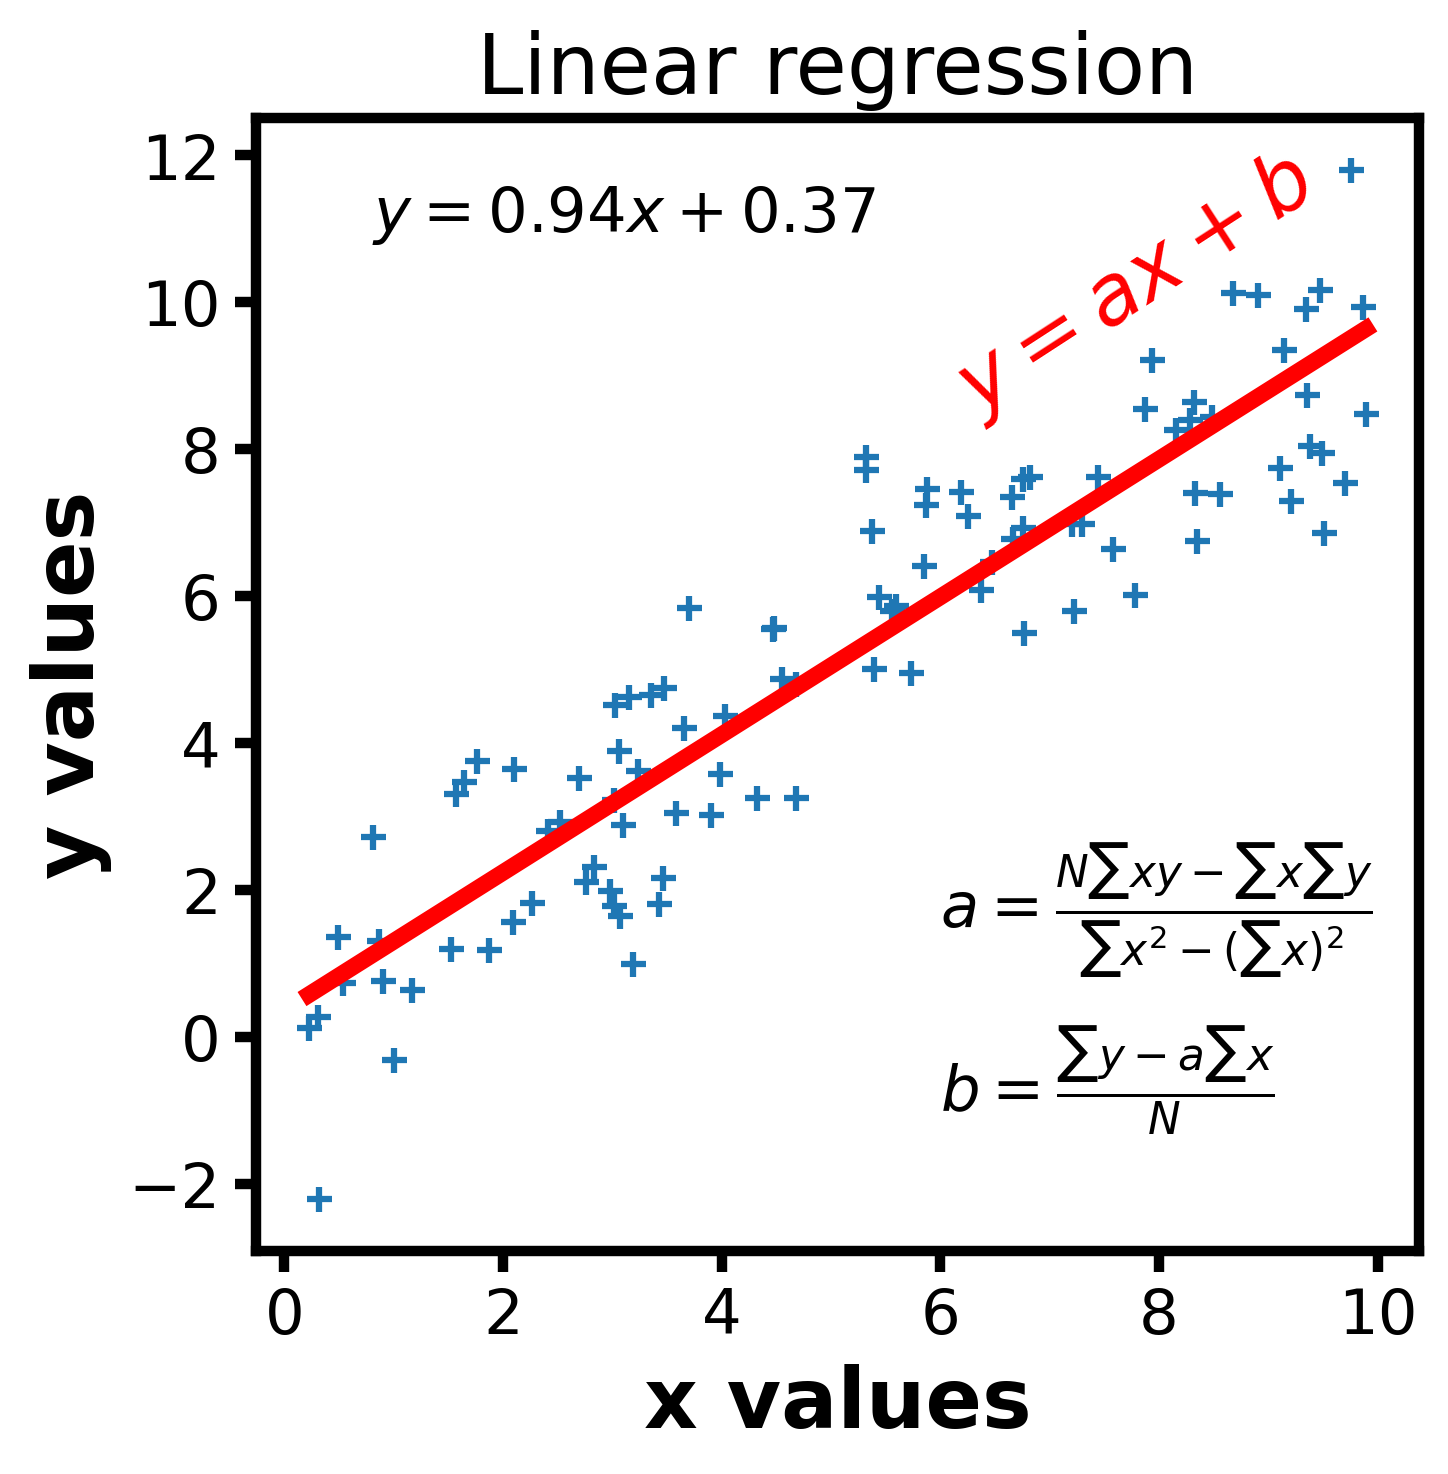

In [532]:
M = np.vstack([x2, np.ones(len(x2))]).T
a, b = np.linalg.lstsq(M, y2, rcond=None)[0]
x = np.linspace(np.min(x2), np.max(x2), 2)
y = a * x + b

figure = plt.figure()
figure.set_dpi(300)
figure.set_size_inches([5, 5])
figure.set_facecolor("white")

ax = figure.add_subplot()
ax.scatter(x2, y2, marker="+")
ax.plot(x, y, color="red", linewidth=4)

ax.set_title("Linear regression", fontsize=20)
ax.text(x=0.1, y=0.9, s=f"$y={a:.2f}x+{b:.2f}$", transform=ax.transAxes, fontsize=15)
# ax.text(x=0.1, y=0.8, s=f"y={a:.2f}x+{b:.2f}", transform=ax.transAxes, fontsize=15)

ax.text(x=6, y=8.5, s="$y=ax+b$", color="red", fontsize=20, rotation=33)
ax.text(x=6, y=1.5, s=r"$a = \frac{N \sum xy - \sum x \sum y}{\sum x^2 - (\sum x)^2}$", fontsize=15)
ax.text(x=6, y=-1, s=r"$b = \frac{\sum y - a \sum x }{N}$", fontsize=15)

ax.set_xlabel("x values", fontsize=20, weight=1000)
ax.set_ylabel("y values", fontsize=20, weight=1000)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.tick_params(axis='x', labelsize=15, width=2.5, length=5)
ax.tick_params(axis='y', labelsize=15, width=2.5, length=5)

In [533]:
figure.savefig("test.png")

In the following example we are creating separate subplots:

Text(4, 6, 'This is annotation')

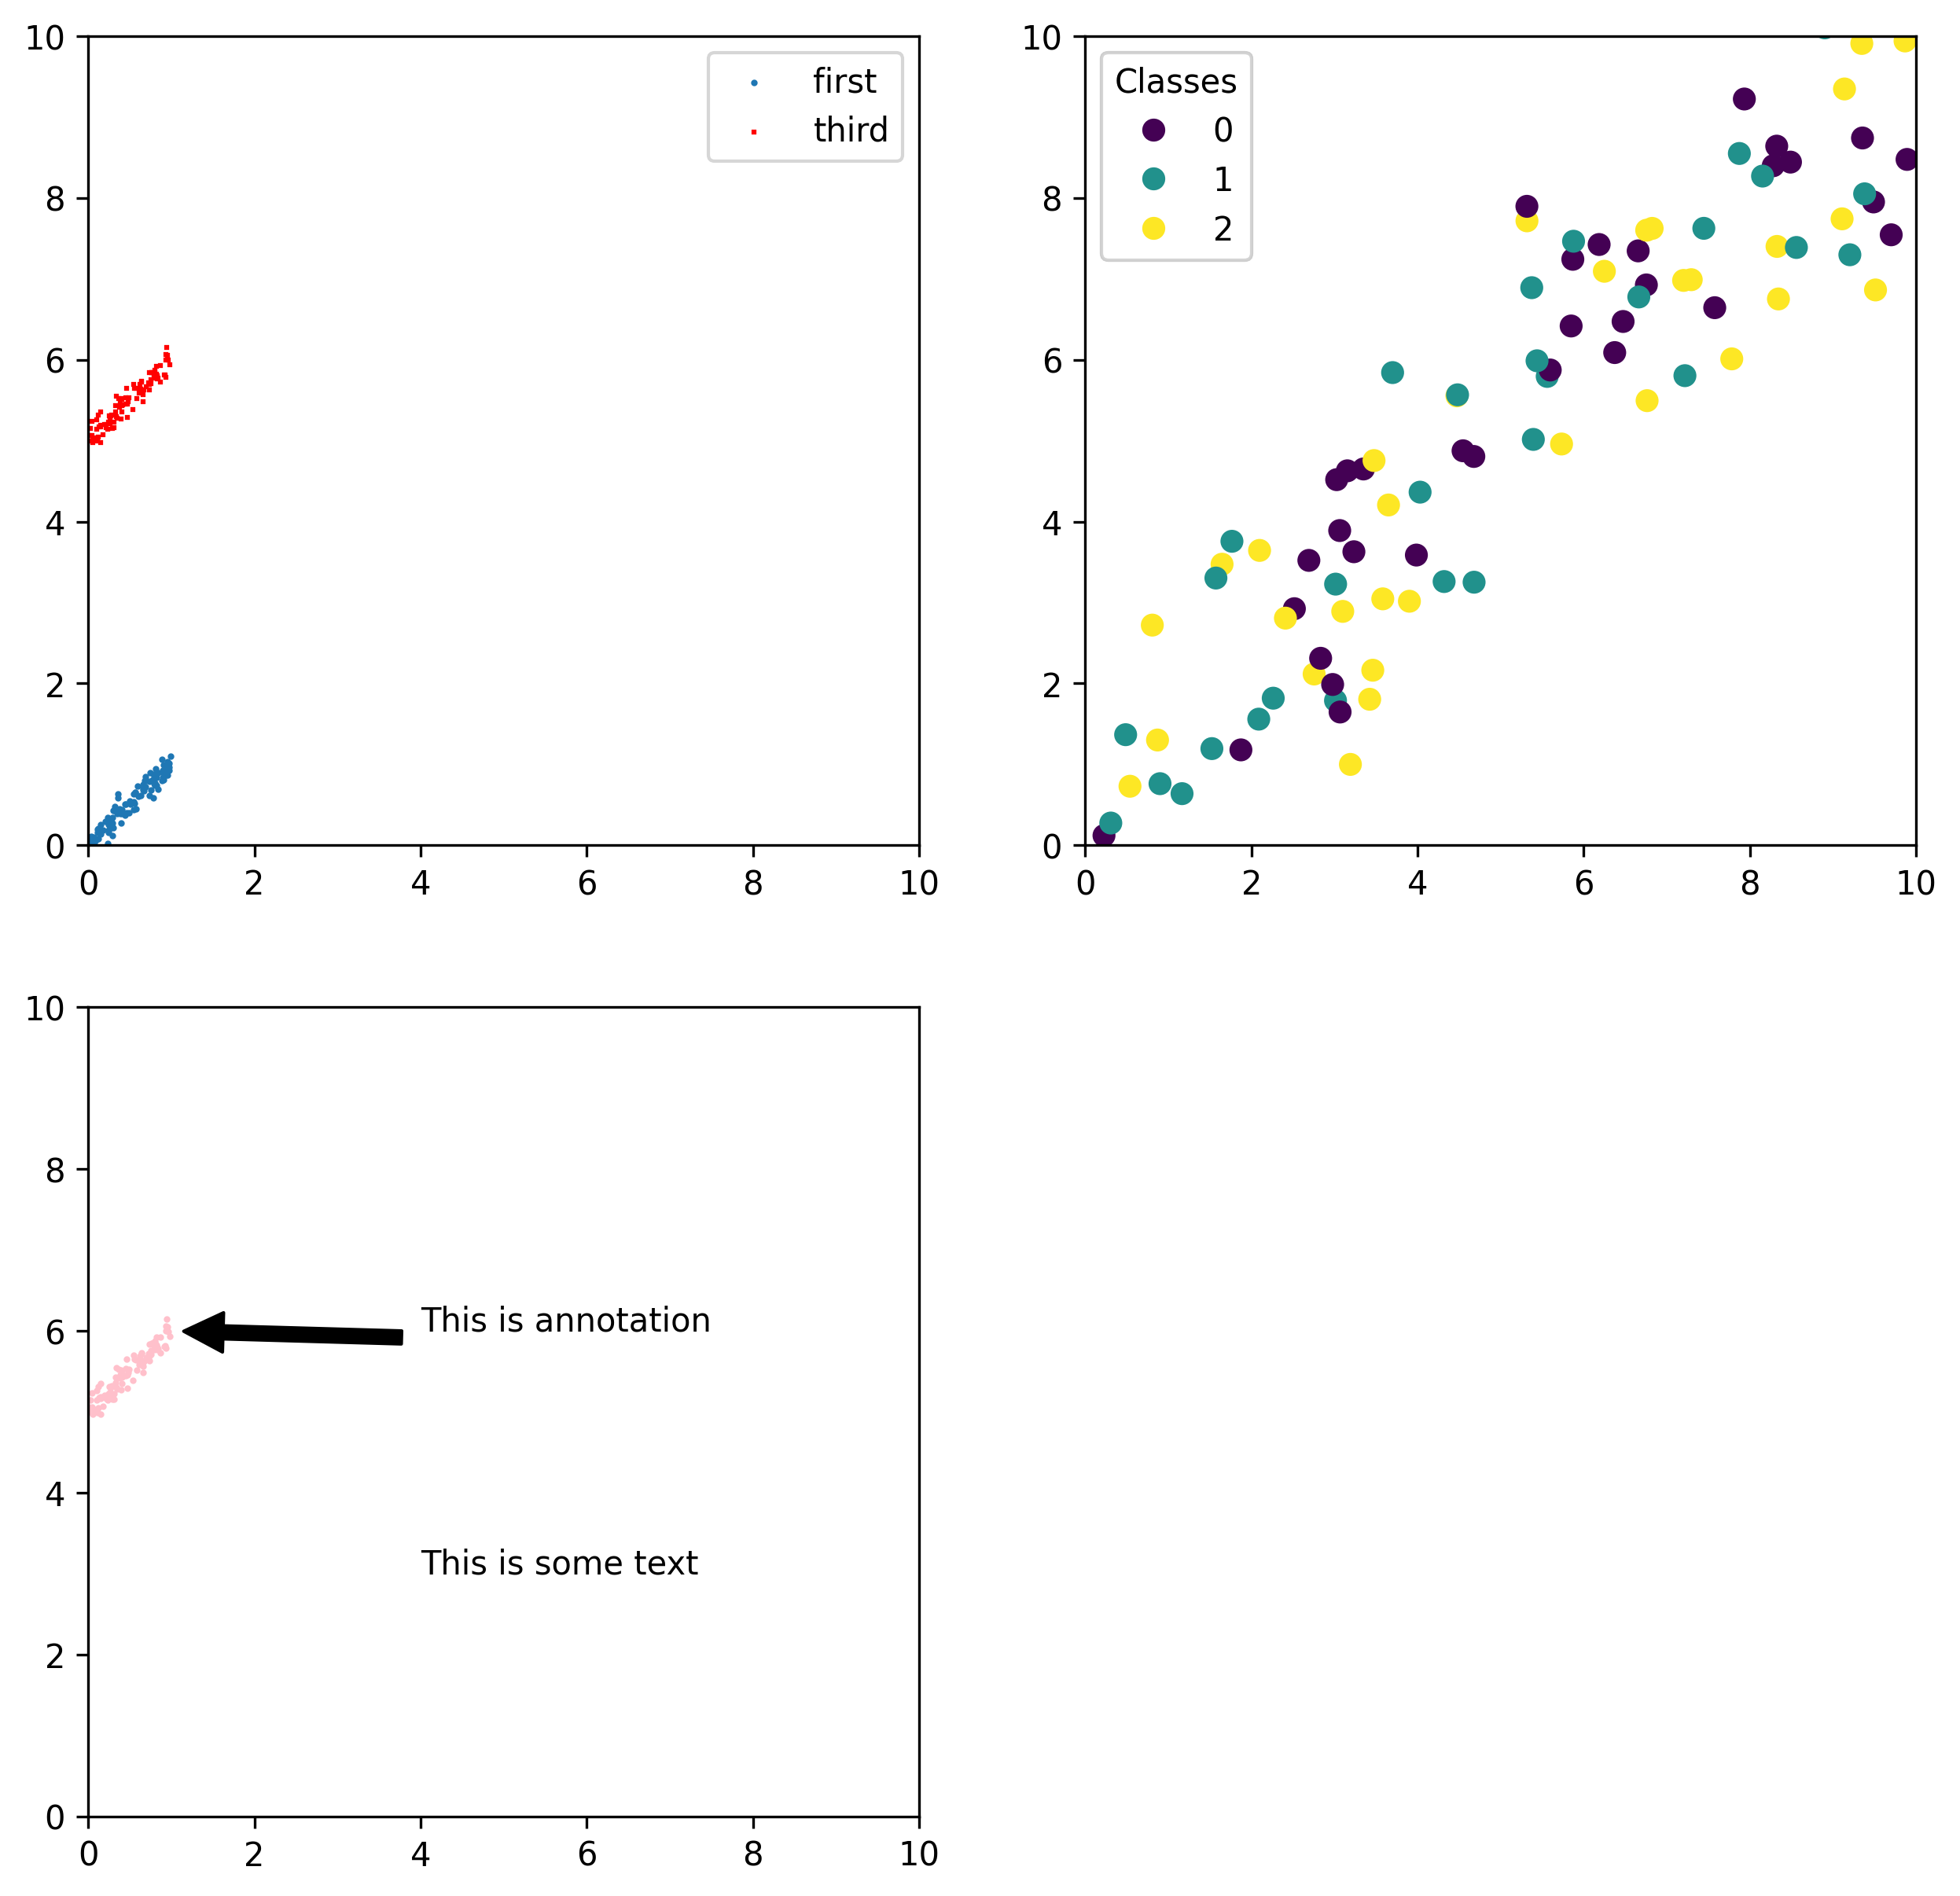

In [536]:
xlimits = [0, 10]
ylimits = [0, 10]

figure = plt.figure()
figure.set_dpi(300)
figure.set_size_inches([10, 10])

ax1 = figure.add_subplot(2, 2, 1)
ax1.scatter(x1, y1, s=1, label="first")
ax1.scatter(x3, y3, s=2, color="red", marker="+", label="third")
ax1.set_xlim(xlimits)
ax1.set_ylim(ylimits)
ax1.legend()

ax2 = figure.add_subplot(2, 2, 2)
ax2.set_xlim(xlimits)
ax2.set_ylim(ylimits)
scatter = plt.scatter(x2, y2, c=point_tag)
legend = ax2.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax2.add_artist(legend)

ax3 = figure.add_subplot(2, 2, 3)
ax3.scatter(x3, y3, s=1, color="pink", marker="o", label="third")
ax3.set_xlim(xlimits)
ax3.set_ylim(ylimits)
ax3.text(x=4, y=3, s="This is some text")
ax3.annotate("This is annotation", xy=[1, 6], xytext=[4, 6], arrowprops=dict(facecolor='black', shrink=0.05))

### Bar plot

A bar plot or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

Again, let's generate some random data:

In [537]:
data1 = np.random.randint(low=1, high=20, size=10)
data2 = np.random.randint(low=1, high=20, size=10)
errors1 = np.random.uniform(size=10)
errors2 = np.random.uniform(size=10)

labels = ["a", "b", "c", "label1", "d", "e", "f", "really long label", "g", "h"]

The easiest variant of bar plot is the following:

<BarContainer object of 10 artists>

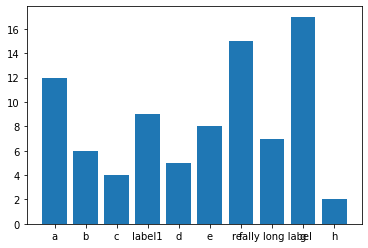

In [ ]:
plt.bar(labels, data)

If whe labels are to long we can rotate and realign them:

<BarContainer object of 10 artists>

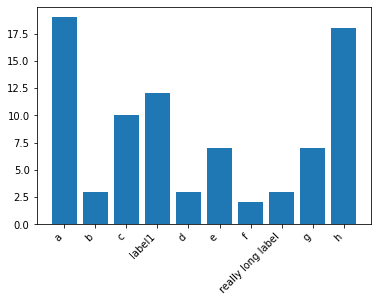

In [538]:
figure = plt.figure()

ax = figure.add_subplot()

plt.xticks(rotation=45, ha='right')
ax.bar(labels, data1)

For two data series, we can stack them on each other:

<BarContainer object of 10 artists>

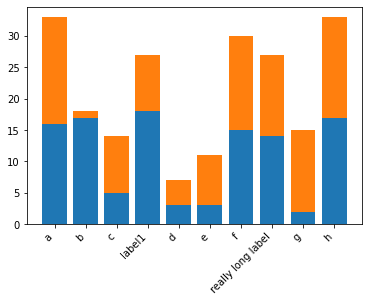

In [ ]:
figure = plt.figure()

ax = figure.add_subplot()

plt.xticks(rotation=45, ha='right')
ax.bar(labels, data1)
ax.bar(labels, data2, bottom=data1)

Here we are adding also a legend:

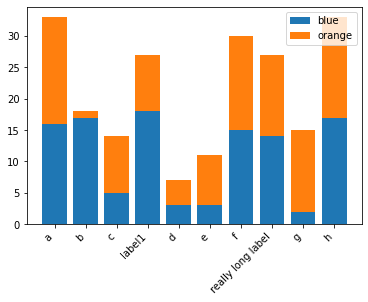

In [ ]:
figure = plt.figure()

ax = figure.add_subplot()

plt.xticks(rotation=45, ha='right')
ax.bar(labels, data1, label="blue")
ax.bar(labels, data2, bottom=data1, label="orange")
ax.legend()

The other way for representing multiple data series is to put bars sided by side:

<BarContainer object of 10 artists>

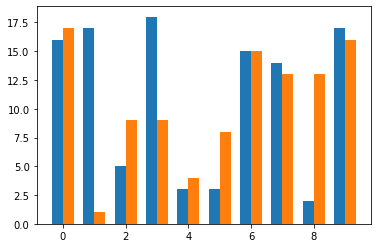

In [ ]:
ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars

figure = plt.figure()

ax = figure.add_subplot()

ax.bar(ind - width/2, data1, width, label='blue')
ax.bar(ind + width/2, data2, width, label='orange')

Again adding legend:

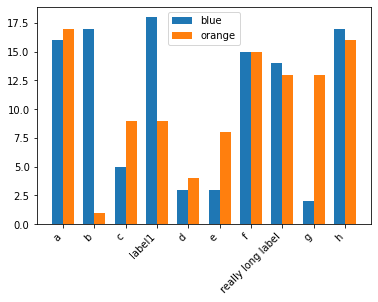

In [ ]:
ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars

figure = plt.figure()

ax = figure.add_subplot()

ax.bar(ind - width/2, data1, width, label='blue')
ax.bar(ind + width/2, data2, width, label='orange')

ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')
ax.legend()

Here we are adjusting tick labels in vertical axis:

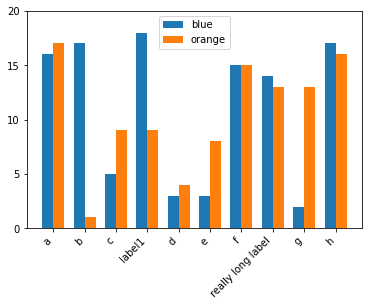

In [ ]:
ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars

figure = plt.figure()

ax = figure.add_subplot()

ax.bar(ind - width/2, data1, width, label='blue')
ax.bar(ind + width/2, data2, width, label='orange')

ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')

ax.set_yticks([0, 5, 10, 15, 20])

ax.legend()

Now let's sum up everything, add errorbars and save figure:

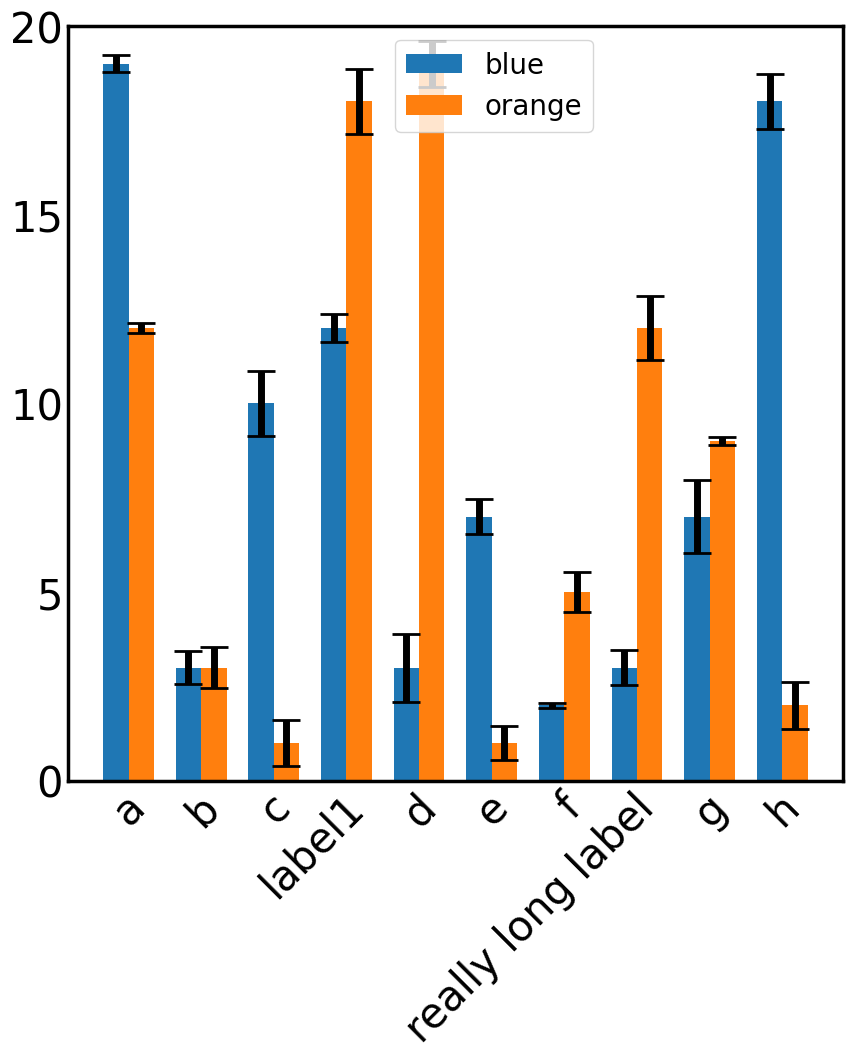

In [542]:
ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars

figure = plt.figure()
figure.set_dpi(100)
figure.set_size_inches([10, 10])
figure.set_facecolor("white")

ax = figure.add_subplot()

ax.bar(ind - width/2, data1, width, yerr=errors1, error_kw={"elinewidth": 5, "capthick": 2, "capsize": 10}, label='blue')
ax.bar(ind + width/2, data2, width, yerr=errors2, error_kw={"elinewidth": 5, "capthick": 2, "capsize": 10}, capsize=10, label='orange')

ax.set_xticks(ind + width)
ax.set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')

ax.set_yticks([0, 5, 10, 15, 20])
ax.set_ylim([0, 20])

ax.legend(loc="upper center", bbox_to_anchor=(0.55, 1), fontsize=20)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.tick_params(axis='x', labelsize=30, width=0, length=0)
ax.tick_params(axis='y', labelsize=30, width=0, length=0)

In [ ]:
figure.savefig("test2.png")

To avoid problem with parts of figure going outside the borders of the image, we can use `tight_layout` method.

In [ ]:
figure.tight_layout()
figure.savefig("test3.png")

In [ ]:
ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars

figure = plt.figure()

ax = figure.add_subplot()

ax.bar(ind - width/2, data1, width, yerr=errors1, label='blue')
ax.bar(ind + width/2, data2, width, yerr=errors2, label='orange')

ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')
ax.legend(loc="upper center", bbox_to_anchor=(0.3, 1))

### Histogram

There is also dedicated type for creating histograms:

(array([4.000e+00, 5.000e+00, 1.000e+01, 2.600e+01, 3.900e+01, 8.000e+01,
        1.500e+02, 2.450e+02, 3.540e+02, 4.880e+02, 6.950e+02, 8.800e+02,
        9.290e+02, 1.043e+03, 9.930e+02, 9.970e+02, 8.480e+02, 6.880e+02,
        4.900e+02, 4.040e+02, 2.990e+02, 1.470e+02, 8.800e+01, 5.300e+01,
        2.600e+01, 1.200e+01, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([-3.65355788, -3.39514291, -3.13672795, -2.87831299, -2.61989802,
        -2.36148306, -2.10306809, -1.84465313, -1.58623816, -1.3278232 ,
        -1.06940823, -0.81099327, -0.55257831, -0.29416334, -0.03574838,
         0.22266659,  0.48108155,  0.73949652,  0.99791148,  1.25632645,
         1.51474141,  1.77315638,  2.03157134,  2.2899863 ,  2.54840127,
         2.80681623,  3.0652312 ,  3.32364616,  3.58206113,  3.84047609,
         4.09889106]),
 <BarContainer object of 30 artists>)

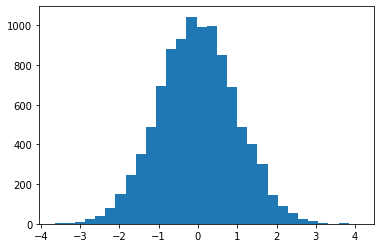

In [ ]:
normal_distribution = np.random.normal(size=10000)

plt.hist(normal_distribution, bins=30)

## Piecharts

If you have multiple types of data e.g. number of views, movies and categorical annotation of a movie (e.g. for historical movie 'time period') it is possible to represent them on pie chart.

In our example we are using Polish YouTube historical-themed channels annotated with 4 groups of categories: period, topic, subject and range.

In [471]:
all_channels = pd.read_json('visualization_data/all_channels.json')

Let's visualize the pie chart of number of videos and views of movies in category topic.

In [493]:
all_channels.temat

0      militarna
1      militarna
2      militarna
3      kulturowa
4      militarna
         ...    
630    militarna
631    kulturowa
632    kulturowa
633    militarna
634    społeczna
Name: temat, Length: 635, dtype: object

As you can see data in spoken category is in Polish. Let's change them into English without doing it manually.

In [473]:
CATEGORIES = ['temat']
TAGS = {'temat' : np.array(['gospodarcza', 'społeczna',  'polityczna', 'kulturowa', 'militarna'])}

CUSTOM_CATEGORY_NAMES = {'temat' : 'topic'}
CUSTOM_TAGS_NAMES = {
    'gospodarcza' : 'economical',
    'społeczna'   : 'social',
    'polityczna'  : 'political',
    'kulturowa'   : 'cultural',
    'militarna'   : 'military'
}

Now we are going to use already prepared for this purpose code. Notice that inner ring represents number of movies in category while outer one represents number of views of all movies in this category.

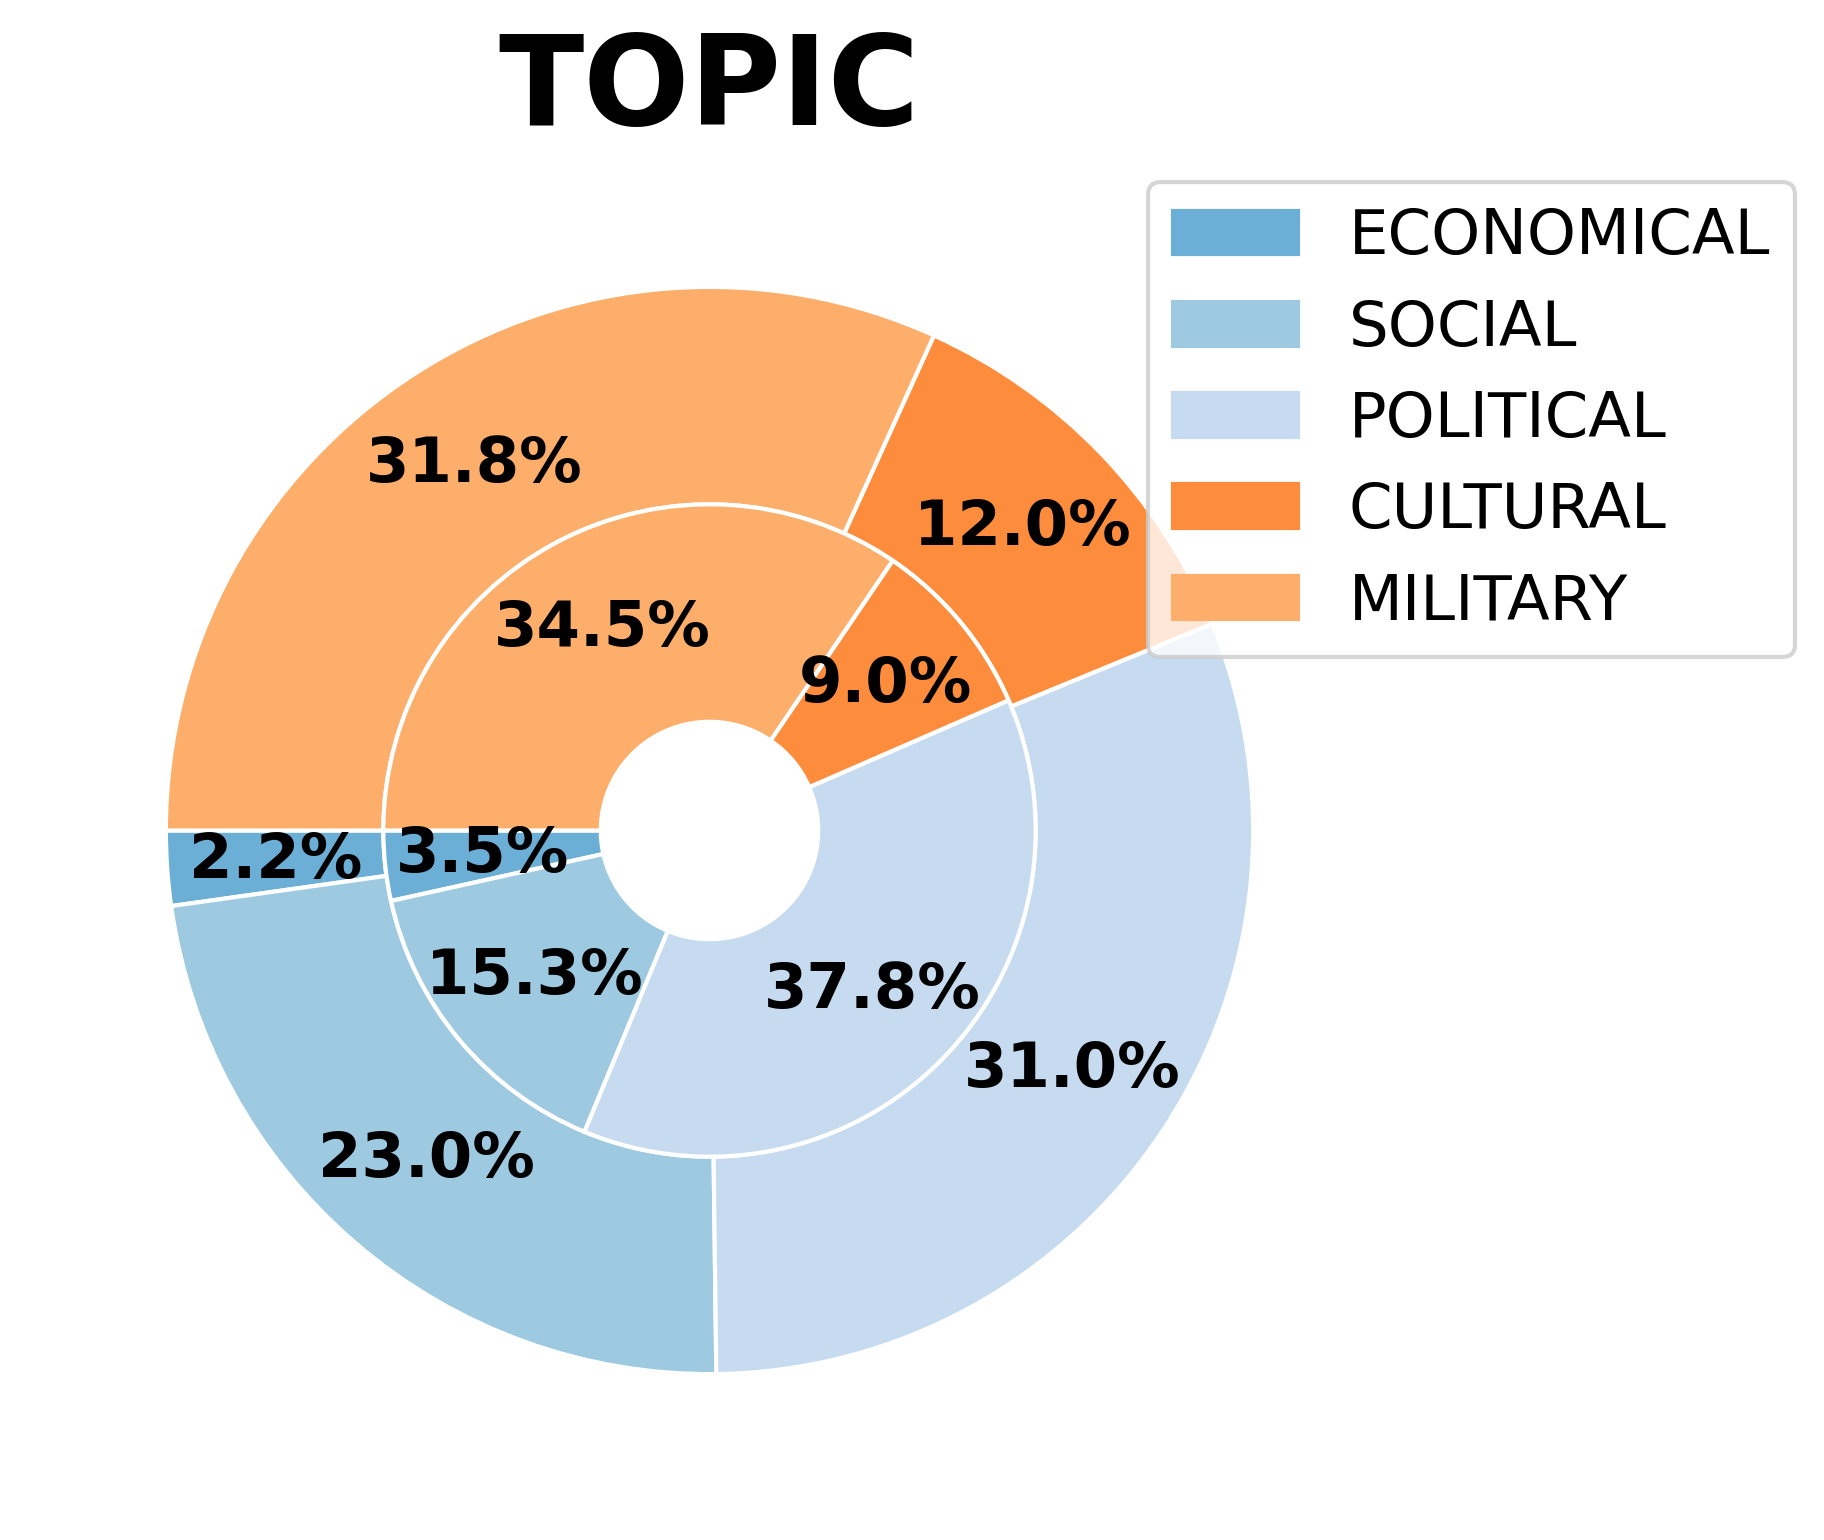

In [506]:
cmap = plt.get_cmap("tab20c")

outer_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 15]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 15]))
size = 0.4
font_size = 15
category = "temat"

fig = plt.figure()
fig.set_dpi(300)
fig.set_size_inches([18, 6])
        
ax = fig.add_subplot()   

tags = TAGS[category]
records_count = []
views_count = []

df = all_channels
        
for tag in tags:
    records_count.append(
        df[df[category].str.lower()==tag].id.count()
    )
    views_count.append(
        df[df[category].str.lower()==tag].viewCount.sum()
    )

ax.set_title(
    CUSTOM_CATEGORY_NAMES[category].upper(),
    fontsize=2 * font_size,
    weight=1000
)

patches = [
    mpatches.Patch(
        color=outer_colors[i],
        label=CUSTOM_TAGS_NAMES[tag].upper()
    ) 
    for i, tag in enumerate(tags)
]
plt.legend(
    handles=patches,
    loc='upper left',
    bbox_to_anchor=(0.8, 0, 0.5, 1),
    fontsize=font_size)

outer_wedges, _, _ = ax.pie(
    views_count,
    radius=1,
    colors=outer_colors,
    wedgeprops=dict(
        width=size,
        edgecolor='w'
    ),
    autopct=lambda x: f"{x:.1f}%",
    pctdistance=0.8,
    textprops=dict(
        color="black", 
        weight=1000, 
        size=font_size
    ), 
    startangle=180
)

inner_wedges, _, _ = ax.pie(
    records_count,
    radius=1 - size,
    colors=inner_colors,
    wedgeprops=dict(
        width=size,
        edgecolor='w'),
    autopct=lambda x: f"{x:.1f}%",
    pctdistance=0.7,
    textprops=dict(
        color="black",
        weight=1000,
        size=font_size
    ),
    startangle=180
)

## Violin (cat and swarm) plot

Violin plot is used for data categorizing and crossing e.g. I would like to check the distribution of movies views count, category topic and range. Each dot represents a movie -- group of movies in range of views, color means topic category and each violin plot a range category (Polish vs. World History).
We are using seaborn Python library.

In [ ]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 3.6 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

Here range (geoloc) is stored. Powszechna means Global History and Polska Polish one.

In [ ]:
all_channels.geoloc

0      powszechna
1      powszechna
2      powszechna
3      powszechna
4      powszechna
          ...    
630        polska
631    powszechna
632        polska
633    powszechna
634    powszechna
Name: geoloc, Length: 635, dtype: object

Let's change them into English:

In [ ]:
all_channels.rename(columns={'temat': 'topic', 'geoloc': 'range'} ,inplace=True)

Function rename changes columns names. First '' is old one and after colon second '' is a new name.

In [ ]:
all_channels.replace({'topic': CUSTOM_TAGS_NAMES}, inplace=True)

Here we change all variables in the column topic for new one using dictionary.

In [ ]:
all_channels.topic

0      military
1      military
2      military
3      cultural
4      military
         ...   
630    military
631    cultural
632    cultural
633    military
634      social
Name: topic, Length: 635, dtype: object

In [ ]:
new_english_tags={'polska': 'Polish', 'powszechna': 'Global' }

In [467]:
all_channels.replace({'range': new_english_tags}, inplace=True)

After changing names we can operate on two plots that made violin plot: catplot and swarmplot.

We combine two plots in one.
On 'x' axis we give main category name and 'hue' means we give category to display enities of another category that are TRUE for 'x' axis category. In other words if on 'x' there are movies with military tag with dots of range category - Polish and Global.
'y' axis is the number of views in range.
The shape of the violin shows us the distribution so the widest place should be where there are the most videos.

/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='topic', ylabel='viewCount'>

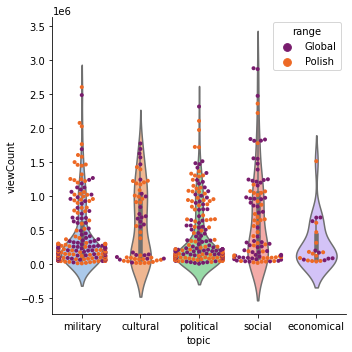

In [468]:
graph=sns.catplot(x='topic', y='viewCount', data=all_channels, kind='violin', palette='pastel',ci=None)
sns.swarmplot(x='topic', y='viewCount', data=all_channels, color='k', ax=graph.ax, size=4, hue='range', palette='inferno')